# Visualise COVID-19 Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data.populations import get_pop_lookup

In [2]:
rel_path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
conf_fn = rel_path + 'time_series_covid19_confirmed_global.csv'
death_fn = rel_path + 'time_series_covid19_deaths_global.csv'
recov_fn = rel_path + 'time_series_covid19_recovered_global.csv'

In [3]:
def reformat_chart(df, gb_country=False):
    '''remove uneeded columns and transpose for easy plotting'''
    df = df.copy()
    del df['Lat']
    del df['Long']
    del df['Province/State']
    if gb_country:
        df = df.groupby('Country/Region').sum().reset_index()
    df.index = df['Country/Region'].values
    del df['Country/Region']
    return df.T

cummulative_deaths = pd.read_csv(death_fn)
cummulative_deaths = reformat_chart(cummulative_deaths, gb_country=True)

In [4]:
def make_new_cases_df(df):
    '''Take cummulative numbers and covert to daily increment'''
    dfnd = df.iloc[1:].values - df.iloc[:-1].values
    dfnd = pd.DataFrame(dfnd)
    dfnd.index = df.index[1:]
    dfnd.columns = df.columns
    return dfnd

daily_deaths = make_new_cases_df(cummulative_deaths)

In [5]:
def make_pop_normal(df, per_x=1000000):
    '''Normalise cummulative deaths by population
    per_x is deaths per x people in population - default: 1 million'''
    pop_lookup = get_pop_lookup.get_pop_dict('data/populations/populations.csv', death_fn)
    dfn = df.copy()
    for country, pop in pop_lookup.items():
        dfn[country] = dfn[country] * per_x / pop
    return dfn[list(pop_lookup.keys())]

deaths_per_mill = make_pop_normal(cummulative_deaths)

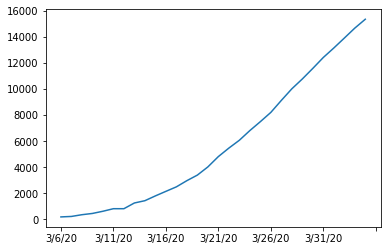

In [6]:
cummulative_deaths['Italy'][-30:].plot(logy=False);

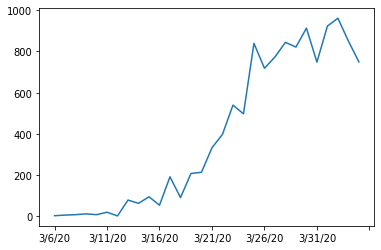

In [7]:
daily_deaths['Spain'][-30:].plot();

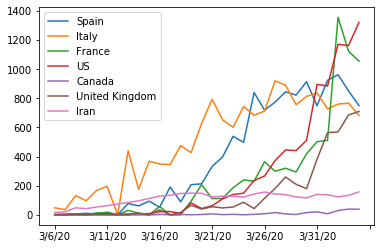

In [8]:
daily_deaths[['Spain', 'Italy', 'France', 'US', 'Canada', 'United Kingdom', 'Iran']][-30:].plot();

In [9]:
daily_deaths.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=181)

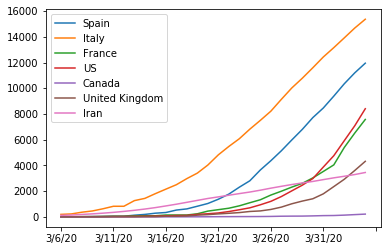

In [10]:
cummulative_deaths[['Spain', 'Italy', 'France', 'US', 'Canada', 'United Kingdom', 'Iran']][-30:].plot(logy=False);

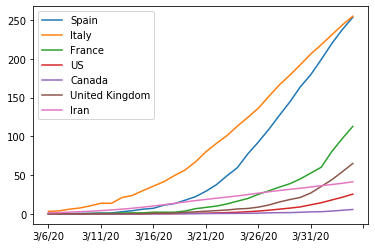

In [11]:
deaths_per_mill[['Spain', 'Italy', 'France', 'US', 'Canada', 'United Kingdom', 'Iran']][-30:].plot(logy=False);